# Explanatory Data Analysis

### Dependencies

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
# Read the Excel file
df = pd.read_excel('Clinical_data.xlsx')

### Stastical descriptors

In [99]:
df.describe()

,Gender,IAH,Weight,Age,Height,Cervical,BMI
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.713405,20.364653,87.683230,49.428571,171.314729,40.649452,29.836178
std,0.452519,18.692784,18.231255,12.392234,9.496841,3.909366,5.580064
min,0.000000,0.000000,45.000000,19.000000,144.000000,30.000000,18.289895
25%,0.000000,6.300000,75.000000,40.000000,165.000000,38.000000,26.038781
50%,1.000000,14.200000,86.000000,49.000000,171.000000,41.000000,28.734672
75%,1.000000,30.000000,97.000000,59.000000,178.000000,43.000000,32.653061
max,1.000000,108.600000,165.000000,88.000000,197.000000,53.000000,63.654952


In [100]:
df.dtypes

Patient      object
Gender        int64
IAH         float64
Weight      float64
Age         float64
Height      float64
Cervical    float64
BMI         float64
dtype: object

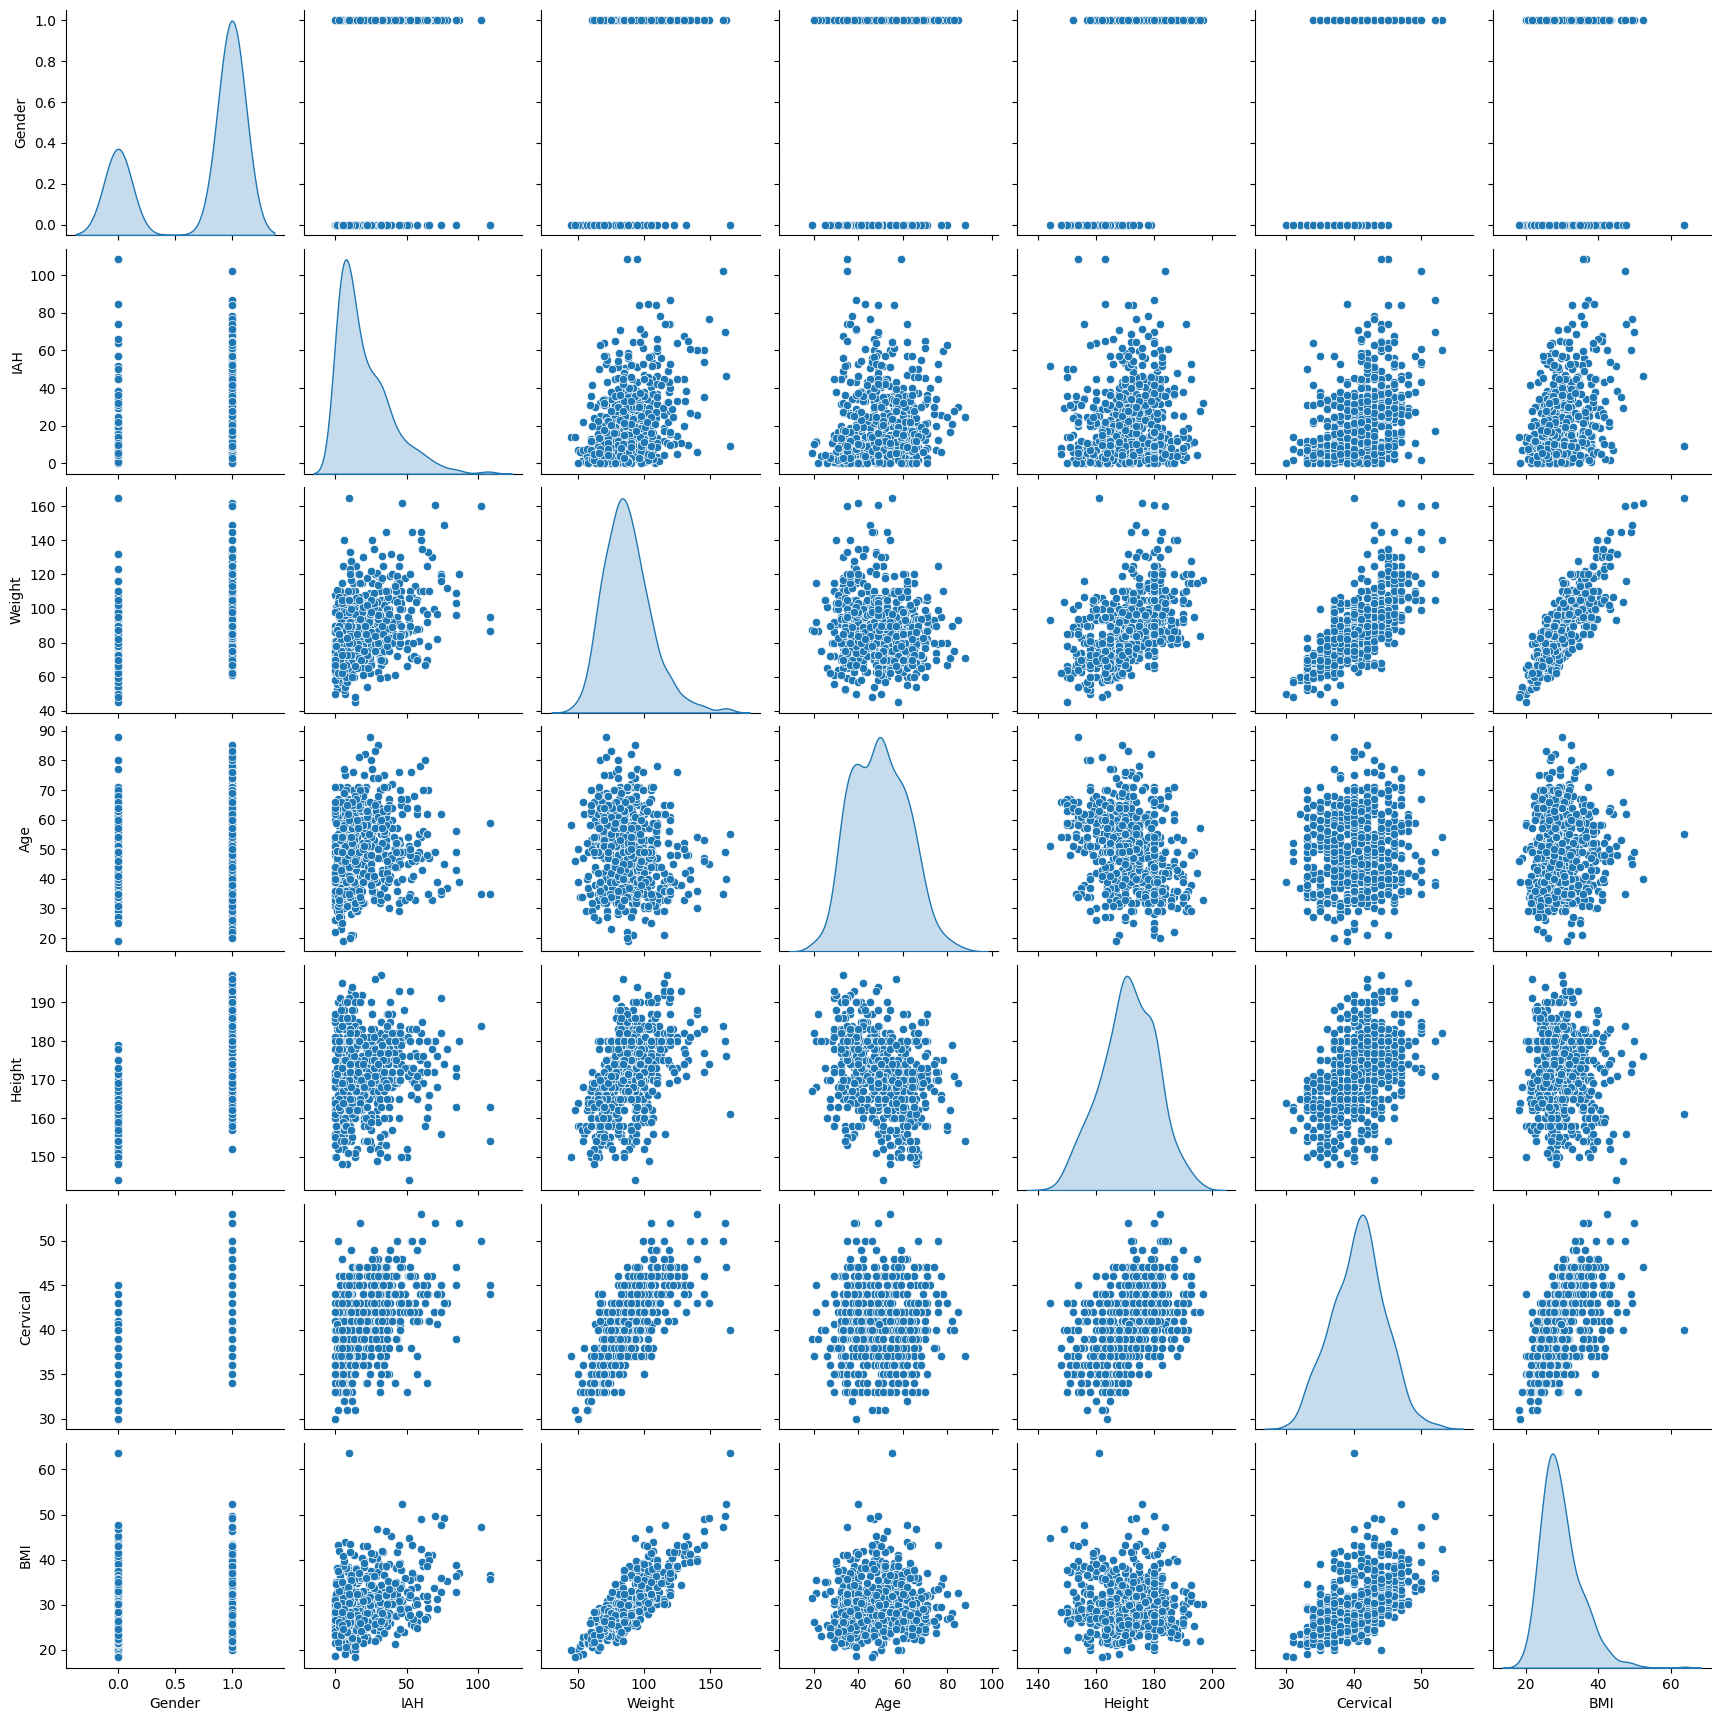

In [101]:
# Pairplot to see the relationships
sns.pairplot(df.drop(columns=['Patient']), diag_kind='kde')

<Axes: >

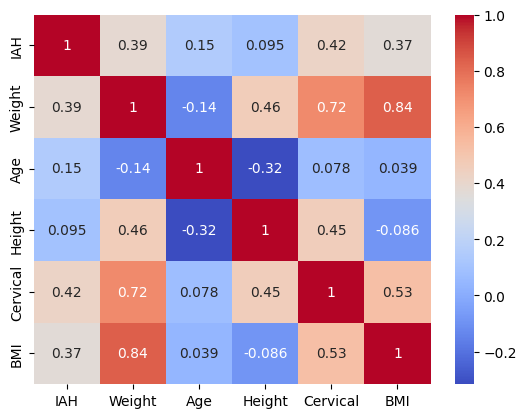

In [102]:
# Correlation Matrix
corr_matrix = df.drop(columns=['Patient', 'Gender']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

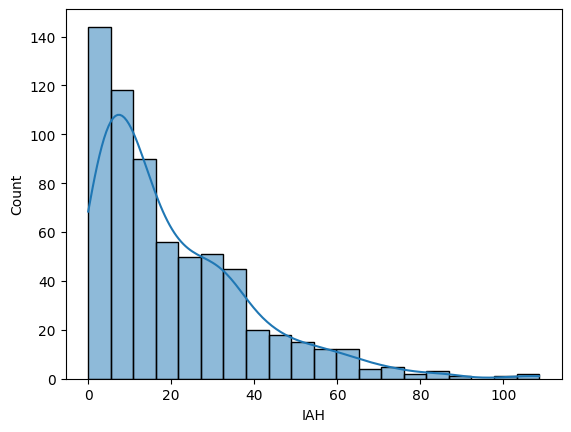

In [103]:
# Distribution of IAH
sns.histplot(df['IAH'], kde=True)
plt.show()

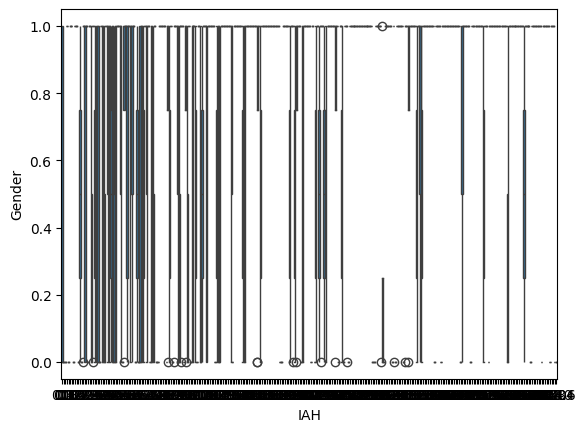

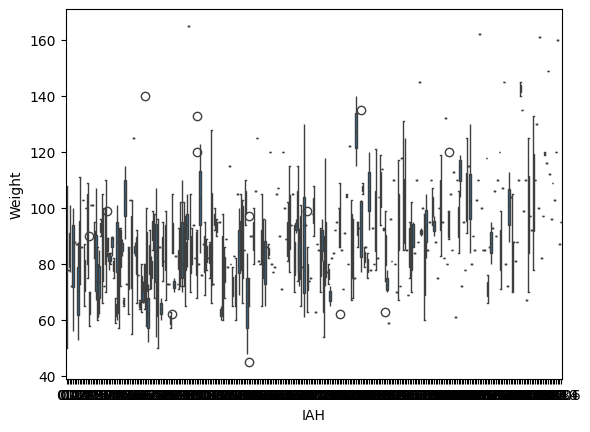

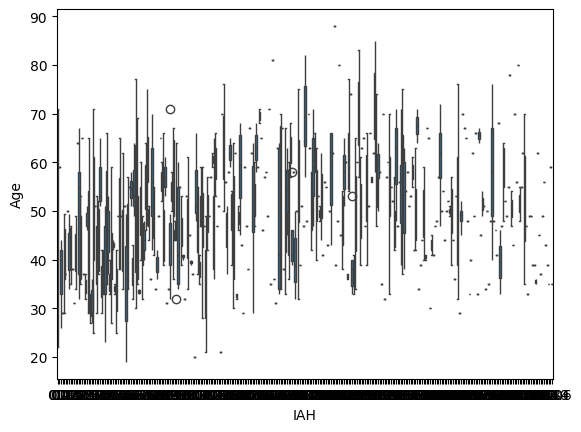

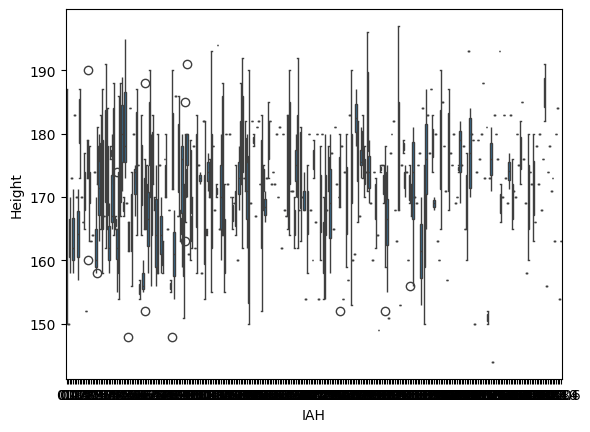

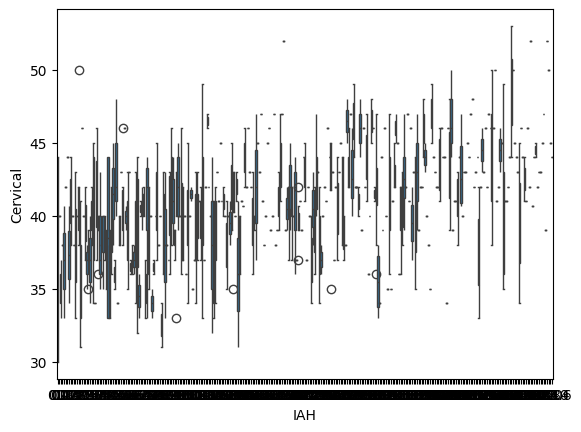

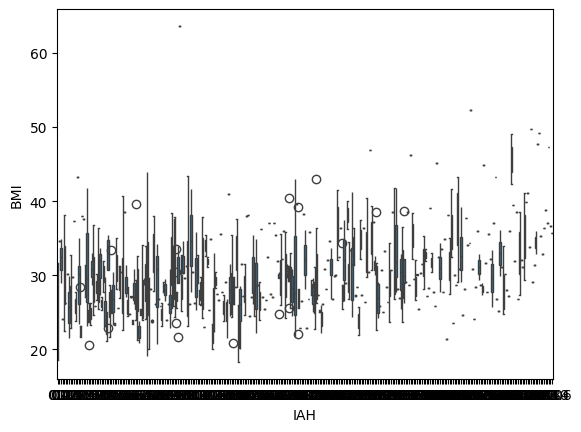

In [104]:
# Boxplots to see the distribution of features with respect to IAH
features = df.columns.drop(['Patient', 'IAH'])
for feature in features:
    sns.boxplot(x='IAH', y=feature, data=df)
    plt.show()

In [105]:
from scipy.stats import pearsonr

# Calculate the p-values for the correlation coefficients
p_values = corr_matrix.copy()
for row in corr_matrix.index:
    for col in corr_matrix.columns:
        if row != col:
            _, p_value = pearsonr(df[row], df[col])
            p_values.loc[row, col] = p_value
        else:
            p_values.loc[row, col] = 1.0  # p-value for correlation with itself is 1

# Display the p-values
print(p_values.round(4))

             IAH  Weight     Age  Height  Cervical     BMI
IAH       1.0000  0.0000  0.0001  0.0154    0.0000  0.0000
Weight    0.0000  1.0000  0.0004  0.0000    0.0000  0.0000
Age       0.0001  0.0004  1.0000  0.0000    0.0468  0.3243
Height    0.0154  0.0000  0.0000  1.0000    0.0000  0.0287
Cervical  0.0000  0.0000  0.0468  0.0000    1.0000  0.0000
BMI       0.0000  0.0000  0.3243  0.0287    0.0000  1.0000


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'IAH'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Cervical'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >, <Axes: >]],
      dtype=object)

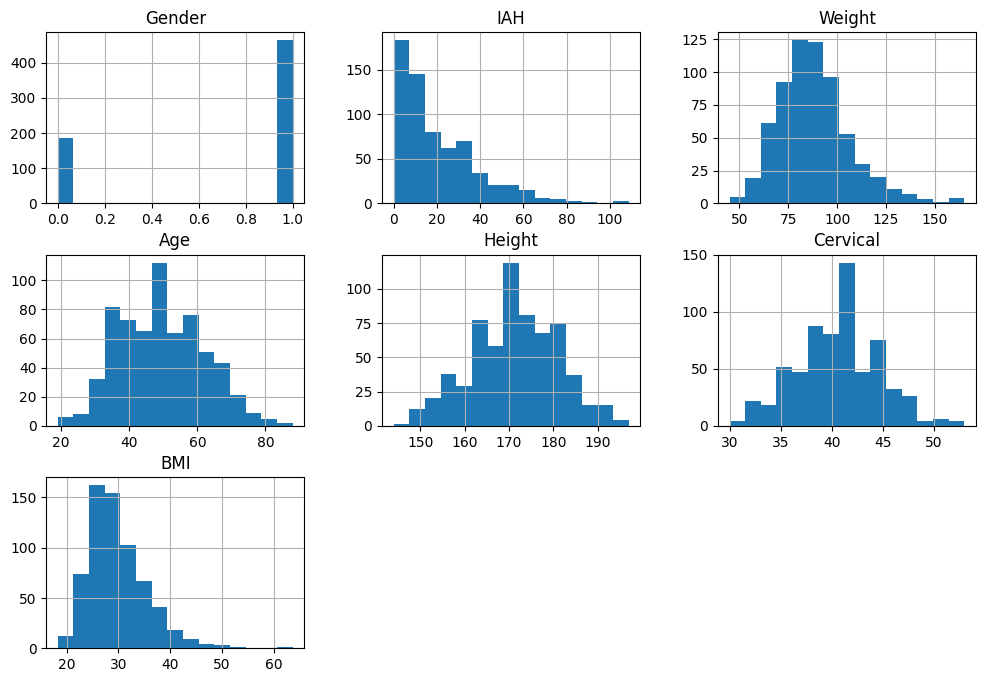

In [106]:
# Plot histograms for numeric features
df.hist(bins=15, figsize=(12, 8), layout=(3, 3))